# Regression

## 1.Linear models

***

* 1.1 Formulation

***

Assume instance $ \mathbf{x} = (x_1, x_2, ... , x_d)^T  $, here $T$ means the matrix transpose. Linear model use linear combination of all attributes to do prediction.

\begin{equation}
f(\mathbf{x}) = w_1x_1 + w_2x_2 + ... + w_dx_d + b, \tag{1}
\end{equation}

or

\begin{equation}
    f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b. \tag{2}
\end{equation}

***

* 1.2 Linear regression

***

Use the linear model to obtain the relationship between the dependent variable (test results, $y_i$) and independent variables (selected features, $x_i$). If only one explanatory variable is considered, it is called simple linear regression, for more than one, it is called multiple linear regression. If multiple dependent variables are considered, it is called multivariate linear regression. Let's start with the simple linear regression.

Given $x_i$ and $y_i$, how to find w and b so that $f(x_i) = wx_i + b \rightarrow y_i$?

We may use the least square approach:

$(w^* , b^*) = \underset{(w , b)}{\arg\min} \sum\limits_{i=1}^m (f(x_i) - y_i)^2 = \underset{(w , b)}{\arg\min} \sum\limits_{i=1}^m (y_i - wx_i - b)^2$, here $m$ means we have $m$ instances.

Let's set
$E_{(w, b)} = \sum\limits_{i=1}^m (y_i - wx_i - b)^2$, here $E_{(w, b)}$ is the cost function. 

Perform parameter estimation of least square approach

\begin{equation}
    \frac{\partial E}{\partial w} = 2 \left( w \sum\limits_{i=1}^m x_i^2 - \sum\limits_{i=1}^m (y_i - b)x_i \right) = 0, \tag{3}
\end{equation}

\begin{equation}
    \frac{\partial E}{\partial b} = 2 \left( mb - \sum\limits_{i=1}^m (y_i - wx_i) \right) = 0. \tag{4}
\end{equation}

We then have

\begin{equation}
    w = \frac{ \sum\limits_{i=1}^m y_i (x_i - \frac{1}{m}\sum\limits_{i=1}^m x_i )}{\sum\limits_{i=1}^m x_i^2 - \frac{1}{m} \left( \sum\limits_{i=1}^m x_i \right)^2}, \tag{5}
\end{equation}

\begin{equation}
    b = \frac{1}{m}\sum\limits_{i=1}^m (y_i - w x_i). \tag{6}
\end{equation}

Similarly, the cost function for multiple variables (let's say d varaibles) is: $E_{(\mathbf{w}, b)} = E_{(w_1, w_2, ..., w_d, b)} = \sum\limits_{i=1}^m (y_i - \mathbf{w}^T\mathbf{x} - b)^2$. Combine coeficients $\mathbf{w}$ and $b$, we obtain a new vector $\hat{\mathbf{w}} = (\mathbf{w} ; b)$. The dataset $\mathbf{XX}$ with the size $m \times (d+1)$ can be read as 

\begin{equation}
\mathbf{XX} = \begin{pmatrix}
x_{11} & x_{12} & ... & x_{1d}\\
x_{21} & x_{22} & ... & x_{2d}\\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & ... & x_{md}
\end{pmatrix} =  \begin{pmatrix}
\mathbf{x_{1}^T} & 1 \\
\mathbf{x_{2}^T} & 1 \\
\vdots & \vdots \\
\mathbf{x_{m}^T} & 1
\end{pmatrix}.       \tag{7}
\end{equation}

The label vector is $\mathbf{y} = (y_1; y_2; ...; y_m)$. Based on least square method, we need obtain the following

\begin{equation}
\mathbf{\hat{w}}^* = \underset{\mathbf{\hat{w}}}{\arg\min} (\mathbf{y} - \mathbf{XX\hat{w}})^T  (\mathbf{y} - \mathbf{XX\hat{w}}).  \tag{8}
\end{equation}

Let $E_{\mathbf{\hat{w}}} = (\mathbf{y} - \mathbf{XX\hat{w}})^T  (\mathbf{y} - \mathbf{XX\hat{w}})$, then the derivative w.r.t. $\mathbf{\hat{w}}$ is

\begin{equation}
\frac{\partial E_{\mathbf{\hat{w}}}}{\partial \mathbf{\hat{w}}} = 2\mathbf{XX}^T (\mathbf{XX}\mathbf{\hat{w}} - \mathbf{y}) .  \tag{9}
\end{equation}

We then use Gradient Descent method to iterativly update the unknown coefficients

\begin{equation}
\mathbf{\hat{w}}^{(n+1)} = \mathbf{\hat{w}}^{(n)} - \left ( \alpha \frac{\partial E_{\mathbf{\hat{w}}}}{\partial \mathbf{\hat{w}}} \right)^n.  \tag{10}
\end{equation}

***

* 1.3 Hand-on example

***

Coefficients:  W =  [9.8462603] , b =  0.18640284286555492
MSE =  0.29886700774758884
RMSE =  0.5466873034446555


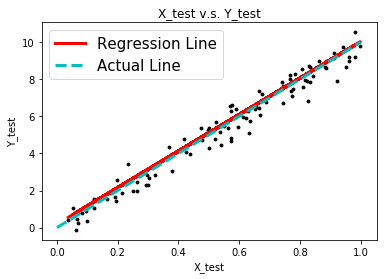

In [57]:
import numpy as np 
import pandas as pd 
import math as m
import matplotlib.pyplot as plt 

def train_test_split(X, Y, train_size, shuffle):
    ''' Perform tran/test datasets splitting '''
    if shuffle:
        randomize = np.arange(len(X))
        np.random.shuffle(randomize)
        X = X[randomize]
        Y = Y[randomize]
    s_id = int(len(Y) * train_size)
    X_train, X_test = X[:s_id], X[s_id:]
    Y_train, Y_test = Y[:s_id], Y[s_id:]

    return X_train, X_test, Y_train, Y_test    


def metric_mse(Y_label, Y_pred):
    ''' Evaluate mean squared error (MSE) '''
    return np.mean(np.power(Y_label - Y_pred, 2))

def metric_rmse(Y_label, Y_pred):
    ''' Evaluate root mean squared error (RMSE) '''
    return m.sqrt(np.mean(np.power(Y_label - Y_pred, 2)))

def readin_data(path):
    ''' Evaluate root mean squared error (RMSE) '''
    df = pd.read_csv(path) 
    X = df.iloc[:,:-1].values 
    Y = df.iloc[:,1].values 
    return X, Y
    
def generate_dataset_simple(beta, n, std_dev):
    ''' Generate dataset '''
    X = np.random.rand(n)
    e = np.random.randn(n) * std_dev
    Y = X * beta + e
    X = X.reshape((n,1))
    return X, Y    

class LinearRegression() : 
    ''' Linear Regression model. 
        Used to obtain the relationship between dependent variable and independent variables.'''
    def __init__(self, iterations, learning_rate):   
        self.lr = learning_rate 
        self.it = iterations 
             
    def fit(self, X, Y): 
        # m instances, d atrributes 
        self.m, self.d = X.shape 
        # weight initialization 
        self.W = np.zeros(self.d+1) 
        self.X = X 
        self.XX = np.ones((self.m, self.d+1)) 
        self.XX[:,:-1] = self.X
        self.Y = Y      
        for i in range(self.it):   
            self.update_weights() 
        return self
      
    def update_weights(self): 
        Y_pred = self.predict(self.XX) 
        # calculate gradients   
        dW = (self.XX.T).dot(Y_pred - self.Y)/self.m  
        # update weights 
        self.W = self.W - self.lr * dW 
        return self
       
    def predict(self, X): 
        return X.dot(self.W)
  
def main(): 
    # Import data
    X, Y = generate_dataset_simple(10, 200, 0.5)
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.5, shuffle=False)
    # Model Learning
    model = LinearRegression(learning_rate = 0.01, iterations = 15000) 
    model.fit(X_train, Y_train) 
    # Model Working
    M, D = X_test.shape
    TEST = np.ones((M, D+1)) 
    TEST[:,:-1] = X_test
    Y_pred = model.predict(TEST)  
    # Statistics
    mse = metric_mse(Y_test, Y_pred)
    rmse = metric_rmse(Y_test, Y_pred)
    print('Coefficients: ', 'W = ', model.W[:-1], ', b = ', model.W[-1]) 
    print('MSE = ', mse)    
    print('RMSE = ', rmse)
    # Visualization
    plt.scatter( X_test, Y_test, color = 'black', s=8) 
    plt.plot( X_test, Y_pred, color = 'red', linewidth=3) 
    plt.title( 'X_test v.s. Y_test') 
    plt.xlabel( 'X_test') 
    plt.ylabel( 'Y_test') 
    X_actual = np.array([0, 1])
    Y_actual = X_actual*10
    plt.plot(X_actual, Y_actual, 'c--', linewidth=3) 
    plt.legend(('Regression Line', 'Actual Line'),loc='upper left', prop={'size': 15})
    plt.show()
    
if __name__ == '__main__':  
    main()

(100, 1)
(100,)
(100,)
Coefficients:  W =  0.3220851463737741 [-0.0198863   3.33468222 -5.09290652 -4.03126398  5.32447435]
MSE =  0.021735503009563915
RMSE =  0.14742965444429393


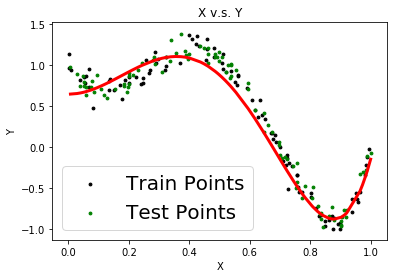

In [45]:
import numpy as np 
import pandas as pd 
import math as m
import matplotlib.pyplot as plt 

def train_test_split_po(X, Y, train_size, shuffle):
    ''' Perform tran/test datasets splitting '''
    if shuffle:
        randomize = np.arange(len(X))
        np.random.shuffle(randomize)
        X = X[randomize]
        Y = Y[randomize]
    s_id = int(len(Y) * train_size)
    X_train, X_test = X[:s_id], X[s_id:]
    Y_train, Y_test = Y[:s_id], Y[s_id:]
    Y_train = Y_train.reshape((-1, 1))
    X_train1 = np.append(X_train, Y_train, axis = 1) 
    X_train1 = X_train1[np.argsort(X_train1[:, 0])]
    Y_test = Y_test.reshape((-1, 1))
    X_test1 = np.append(X_test, Y_test, axis = 1) 
    X_test1 = X_test1[np.argsort(X_test1[:, 0])]
    X_train, X_test = X_train1[:,:-1], X_test1[:,:-1]
    Y_train, Y_test = X_train1[:,-1], X_test1[:,-1]
    Y_train=np.squeeze(Y_train)
    Y_test=np.squeeze(Y_test)
    return X_train, X_test, Y_train, Y_test    


def metric_mse(Y_label, Y_pred):
    ''' Evaluate mean squared error (MSE) '''
    return np.mean(np.power(Y_label - Y_pred, 2))

def metric_rmse(Y_label, Y_pred):
    ''' Evaluate root mean squared error (RMSE) '''
    return m.sqrt(np.mean(np.power(Y_label - Y_pred, 2)))

def readin_data(path):
    ''' Evaluate root mean squared error (RMSE) '''
    df = pd.read_csv(path) 
    X = df.iloc[:,:-1].values 
    Y = df.iloc[:,1].values 
    return X, Y
    
def generate_dataset_simple(beta, n, std_dev):
    ''' Generate dataset '''
    X = np.random.rand(n)
    e = np.random.randn(n) * std_dev
    Y = X * beta + e
    X = X.reshape((n,1))
    return X, Y  

def generate_dataset_polynomial(beta, n, std_dev):
    ''' Generate polynomial dataset '''
    
    e = np.random.randn(n) * std_dev/n
    X = np.random.random_sample(n)
    X = np.sort(X)
    Y = 1- 6*X +36*X**2 - 53*X**3 + 22*X**5 + e
    X = X.reshape((n,1))
    return X, Y 


def standardization(X,degree):
    """ A scaling technique where the values
    are centered around the mean with 
    a unit standard deviation. 
    This means that the mean of the attribute 
    becomes zero and the resultant distribution 
    has a unit standard deviation. 
    ----------------------------------------
    degree: polynomial regression degree
    """
    X[:, :(degree)] = (X[:, :(degree)] - np.mean(X[:, :(degree)], axis = 0))/ \
    np.std(X[:, :(degree)], axis = 0)
    return X 

def normalization(X,degree):
    """ A scaling technique in which values 
    are shifted and rescaled so that they 
    end up ranging between 0 and 1. 
    It is also known as Min-Max scaling 
    ----------------------------------------
    degree: polynomial regression degree
    """
    X[:, :(degree)] = (X[:, :(degree)] - np.amin(X[:, :(degree)], axis = 0))/ \
    (np.amax(X[:, :(degree)], axis = 0) - np.amin(X[:, :(degree)], axis = 0))
    return X 


def transformation(m, X, degree):
    tmp = np.zeros([m, 1])
    for j in range(degree + 1):
        if j != 0:
            x_pow = np.power(X, j) 
            tmp = np.append(tmp, x_pow.reshape(-1, 1), axis = 1) 
    tmp = np.append(tmp, np.ones((m, 1)), axis = 1) 
    Xt=tmp[:,1:]
    return Xt

def transformation_predict(m, X, degree):
    tmp = np.zeros([m, 1])
    for j in range(degree + 1):
        if j != 0:
            x_pow = np.power(X, j) 
            tmp = np.append(tmp, x_pow.reshape(-1, 1), axis = 1) 
    tmp = np.append(tmp, np.ones((m, 1)), axis = 1) 
    Xt=tmp[:,1:-1]
    return Xt

class PolynomialRegression(): 
    ''' Univariate Polynomial Regression model. 
        Used to obtain the relationship between dependent variable and independent variables.
        -------------------------------------------------------------------------------------
        degree shall be great equal 2
        '''
    
    def __init__(self, iterations, learning_rate, degree):   
        self.lr = learning_rate 
        self.it = iterations 
        self.de = degree 
             
    def fit(self, X, Y): 
        # m instances, d atrributes 
        self.m, self.d = X.shape 
        # weight initialization 
        self.W = np.zeros(self.de+1) 
        self.X = X 
        self.Xt = transformation(self.m, self.X, self.de)
        self.Xs = standardization(self.Xt, self.de)
        self.Y = Y      
        for i in range(self.it):   
            self.update_weights() 
        return self
    
    def update_weights(self): 
        Y_pred = self.predict(self.X) 
        # calculate gradients   
        dW = (self.Xs.T).dot(Y_pred - self.Y)/self.m  
        # update weights 
        self.W = self.W - self.lr * dW 
        return self
       
    def predict(self, X):
        self.Xt = transformation(X.shape[0], X, self.de)
        self.Xs = standardization(self.Xt, self.de)
        return self.Xs.dot(self.W)
  
def main(): 
    # Import data
    X, Y = generate_dataset_polynomial(10, 200, 20)
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split_po(X, Y, train_size=.5, shuffle=True)
    # Model Learning
    model = PolynomialRegression(learning_rate = 0.2, iterations = 20000, degree=5) 
    model.fit(X_train, Y_train) 
    print(X_test.shape)
    Y_pred = model.predict(X_test)   
    print(Y_test.shape) 
    print(Y_pred.shape)
    # Statistics
    mse = metric_mse(Y_test, Y_pred)
    rmse = metric_rmse(Y_test, Y_pred)
    print('Coefficients: ', 'W = ', model.W[-1], model.W[:-1]) 
    print('MSE = ', mse)    
    print('RMSE = ', rmse)
    # Visualization
    l1=plt.scatter(X_train, Y_train, color = 'black', s=8) 
    l2=plt.scatter(X_test, Y_test, color = 'green', s=8) 
    l3=plt.plot( X_test, Y_pred, color = 'red', linewidth=3) 
    plt.title( 'X v.s. Y') 
    plt.xlabel( 'X') 
    plt.ylabel( 'Y') 
    plt.legend((l1, l2),('Train Points', 'Test Points'),loc='lower left', prop={'size': 20})
    plt.show()
    
if __name__ == '__main__':  
    main()

***
* 1.4 Additional notes about linear regression
***

1. When performing **Gradient Descent** approach, all features/attributes must have similar scale, or **feature scaling** is required to increase Gradient Descent convergence. We may import `from sklearn.preprocessing import StandardScaler`, then use `StandardScaler()`. (refer [feature scaling](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

2. To avoid local minimum, and to quickly find the global minimum, make sure the cost function is a **convex function** ($\displaystyle i.e., f(\frac{a+b}{2}) \leq \frac{f(a)+f(b)}{2} $).

3. Linear regression assumptions:
    - Exogeneity weak. Independent variable X is fixed variable, it is not random variable;
    - **Linearity**. $f$ is a linear combination of the parameters/coefficients and the independent variables X. Note that, linearity is a restriction on the parameters, not the independent variables X, e.g., polynomial regression can also be linear regression;
    - **Constant variable(Homoscedasticity)**. The variance of residual is the same for any value of independent variables;
    - **Independence**. Observations are independent of each other. The errors are uncorrelated with each other;
    - **Normality**. For any fixed value of X, Y is normally distributed.